# Examining Racial Discrimination in the US Job Market

### Background
Racial discrimination continues to be pervasive in cultures throughout the world. Researchers examined the level of racial discrimination in the United States labor market by randomly assigning identical résumés to black-sounding or white-sounding names and observing the impact on requests for interviews from employers.

### Data
In the dataset provided, each row represents a resume. The 'race' column has two values, 'b' and 'w', indicating black-sounding and white-sounding. The column 'call' has two values, 1 and 0, indicating whether the resume received a call from employers or not.

Note that the 'b' and 'w' values in race are assigned randomly to the resumes when presented to the employer.


### Exercises
You will perform a statistical analysis to establish whether race has a significant impact on the rate of callbacks for resumes.

Answer the following questions **in this notebook below and submit to your Github account**. 

   1. What test is appropriate for this problem? Does CLT apply?
   2. What are the null and alternate hypotheses?
   3. Compute margin of error, confidence interval, and p-value. Try using both the bootstrapping and the frequentist statistical approaches.
   4. Write a story describing the statistical significance in the context or the original problem.
   5. Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis?

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet


#### Resources
+ Experiment information and data source: http://www.povertyactionlab.org/evaluation/discrimination-job-market-united-states
+ Scipy statistical methods: http://docs.scipy.org/doc/scipy/reference/stats.html 
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
+ Formulas for the Bernoulli distribution: https://en.wikipedia.org/wiki/Bernoulli_distribution

****

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

In [2]:
data = pd.io.stata.read_stata('data/us_job_market_discrimination.dta')

# EDA

In [3]:
data.head()

,id,ad,education,ofjobs,yearsexp,honors,volunteer,military,empholes,occupspecific,...,compreq,orgreq,manuf,transcom,bankreal,trade,busservice,othservice,missind,ownership
0,b,1,4,2,6,0,0,0,1,17,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
1,b,1,3,3,6,0,1,1,0,316,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
2,b,1,4,1,6,0,0,0,0,19,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
3,b,1,3,4,6,0,1,0,1,313,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
4,b,1,3,3,22,0,0,0,0,313,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Nonprofit


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4870 entries, 0 to 4869
Data columns (total 65 columns):
id                    4870 non-null object
ad                    4870 non-null object
education             4870 non-null int8
ofjobs                4870 non-null int8
yearsexp              4870 non-null int8
honors                4870 non-null int8
volunteer             4870 non-null int8
military              4870 non-null int8
empholes              4870 non-null int8
occupspecific         4870 non-null int16
occupbroad            4870 non-null int8
workinschool          4870 non-null int8
email                 4870 non-null int8
computerskills        4870 non-null int8
specialskills         4870 non-null int8
firstname             4870 non-null object
sex                   4870 non-null object
race                  4870 non-null object
h                     4870 non-null float32
l                     4870 non-null float32
call                  4870 non-null float32
city        

In [5]:
df_black = data[data.race=='b']
df_white = data[data.race=='w']

In [6]:
data[['call']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4870 entries, 0 to 4869
Data columns (total 1 columns):
call    4870 non-null float32
dtypes: float32(1)
memory usage: 57.1 KB


In [7]:
data[['call']].describe()

,call
count,4870.000000
mean,0.080493
std,0.272079
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [8]:
data[['call']].fillna(0).describe()

,call
count,4870.000000
mean,0.080493
std,0.272079
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [9]:
[sum(df_black.call),sum(df_white.call)]

[157.0, 235.0]

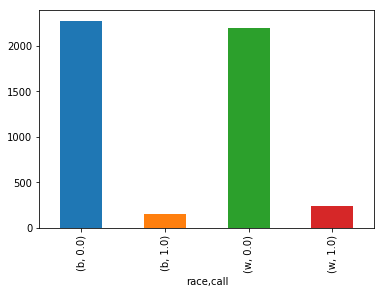

In [10]:
# number of callbacks for black-sounding names
dt = data.groupby('race')['call'].value_counts()
dt.plot(kind='bar',x=0,y=1)
plt.show()

In [11]:
sp_mean_blk = np.mean(df_black['call'])
sp_mean_wht = np.mean(df_white['call'])

In [12]:
sp_mean = np.mean([sp_mean_wht,sp_mean_blk])
pop_mean = np.mean(data['call'])
[sp_mean,pop_mean]

[0.08049281314015388, 0.08049281686544418]

In [13]:
def bootstrap_replicate_1d(data, func):
    return func(np.random.choice(data, size=len(data)))

def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)
    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data,func)

    return bs_replicates

# Confidence Interval

In [14]:
call = data['call']
bs_diff_replicates = draw_bs_reps(call,np.mean,1000)
print("c.i value for bootstrap = {:s}".format(np.percentile(bs_diff_replicates, [2.5, 97.5])))

c.i value for bootstrap = [0.07310062 0.0876848 ]


In [15]:
standard_error = np.std(data['call'])/np.sqrt(len(data['call']))
margin_error = 1.96 * standard_error
print("c.i value for z-test = {:s}".format([np.mean(data['call'])-margin_error,np.mean(data['call'])+margin_error]))

c.i value for z-test = [0.07285194816993638, 0.08813368556095198]


# Hypothesis Testing

In [16]:
combined_mean = np.mean(data['call'])

black_df_shifted = df_black['call'] - np.mean(df_black['call'])+combined_mean

white_df_shifted = df_white['call'] - np.mean(df_white['call'])+combined_mean

# Get bootstrap replicates of shifted data sets
bs_replicates_black = draw_bs_reps(black_df_shifted,np.mean,10000)
bs_replicates_white = draw_bs_reps(white_df_shifted,np.mean,10000)

# Compute replicates of difference of means: bs_diff_replicates
bs_diff_replicates = bs_replicates_black-bs_replicates_white

# Compute the p-value
mean_diff = np.abs(np.mean(df_black['call']) - np.mean(df_white['call']))
print('mean diff : ',mean_diff,', bs_diff_replicates : ',bs_diff_replicates)
p = np.sum(bs_diff_replicates > mean_diff)*1.0 / len(bs_diff_replicates)

# Print p-value
alpha = 0.05
if p < alpha: 
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")

('mean diff : ', 0.03203285485506058, ', bs_diff_replicates : ', array([-0.00451743,  0.00246409,  0.00698154, ...,  0.00657087,
       -0.00944556, -0.01683776]))
The null hypothesis can be rejected


In [17]:
black_var = np.var(df_black['call'])

white_var = np.var(df_white['call'])

denominator = np.sqrt(black_var/len(df_black['call']) + white_var/len(df_white['call']))
mean_diff = np.abs(np.mean(df_black['call']) - np.mean(df_white['call']))
z_val = mean_diff/denominator
p = stats.norm.sf(abs(z_val))*2

alpha = 0.05
    
if p < alpha: 
    print("The null hypothesis can be rejected with z test")
else:
    print("The null hypothesis cannot be rejected with z test")


The null hypothesis can be rejected with z test


<h3>
<ul><li>2 Sample z-test is applicable in this case
<li>CLT is applicable, as the provided data has random and independent variables
</ul> 
<ul>
    <li>Ho - Race has no significant impact on the rate of callbacks for resumes.
    <li>Ha - There is a significant difference
</ul>
<ul>
    <li> Margin of Error = 0.0076408686955078
    <li> Confidence Interval = [0.07285194816993638, 0.08813368556095198]
</ul>
</h3>

<h3>
The p value with hypothesis and frequentist test is statistically significant, hence hypothesis that there is no impact of race on the calls that candidates received can be rejected.
</h3>

<h3>
These Tests cannot be used a proof that race is the most important factor for callback success, these tests only suggest that there is a correlation between the race of the candidate and the number of callbacks. There could be many other factors that could have an impact apart from race, like qualification etc.
</h3>